In [1]:
%reload_ext autoreload
%autoreload 2

from src.db import DB
import pandas as pd
import numpy as np
from functools import partial
from src.backtest import backtest
from src.pattern import market, bollinger

# DB저장

In [2]:
DB().picklize()

ImportError: `Import openpyxl` failed.  Use pip or conda to install the openpyxl package.

In [13]:

%%time
db = DB().load()
db

CPU times: user 2.47 s, sys: 485 ms, total: 2.96 s
Wall time: 2.97 s


date        code   
1999-12-28  A000010     3700.0
            A000020     2710.0
            A000030     3840.0
            A000040    97024.0
            A000050     1802.0
                        ...   
2026-01-30  A900270      176.0
            A900290     3485.0
            A900300      133.0
            A900310      563.0
            A900340      750.0
Name: adjclose, Length: 12046989, dtype: float64

In [9]:
db.unstack('code')

code,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000110,...,A217590,A0007C0,A478340,A476830,A0013V0,A491000,A490470,A0004V0,A493330,A0001A0
date,,,,,,,,,,,,,,,,,,,,,
1999-12-28,3700.0,2710.0,3840.0,97024.0,1802.0,836.0,7752.0,3930.0,2611.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4050.0,3116.0,4150.0,111028.0,1694.0,878.0,8153.0,4515.0,2824.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3925.0,3305.0,3950.0,127032.0,1651.0,1009.0,8153.0,4190.0,2772.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3600.0,2871.0,3500.0,136034.0,1723.0,977.0,8086.0,4200.0,2590.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3800.0,3296.0,3600.0,122030.0,1644.0,982.0,8487.0,4000.0,2711.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,NaN,6160.0,NaN,452.0,8600.0,NaN,60300.0,17970.0,109000.0,NaN,...,14770.0,35800.0,47100.0,157600.0,8470.0,80800.0,26100.0,15490.0,17140.0,NaN
2026-01-27,NaN,6140.0,NaN,449.0,8780.0,NaN,62100.0,18010.0,108300.0,NaN,...,15680.0,34700.0,48850.0,157700.0,8500.0,82500.0,28400.0,20100.0,19580.0,NaN
2026-01-28,NaN,6110.0,NaN,444.0,8840.0,NaN,61000.0,17880.0,109700.0,NaN,...,15260.0,42200.0,49100.0,159500.0,8740.0,80300.0,29100.0,20250.0,19490.0,NaN


In [32]:
db.loc[:'2012']

date        code   
1999-12-28  A000010     3700.0
            A000020     2710.0
            A000030     3840.0
            A000040    97024.0
            A000050     1802.0
                        ...   
2012-01-02  A900120    22117.0
            A900130      510.0
            A900140     4073.0
            A900150     1620.0
            A900180     1898.0
Name: adjclose, Length: 4662264, dtype: float64

# 백테스트

In [2]:
start = "2000-01-01"
end = "2025-12-31"

boll = partial(bollinger, max_band_pct=5, high_window=252)
boll_percentile = partial(bollinger, band_pct_type='percentile', max_band_pct=5, high_window=252)
# boll_topclose = partial(bollinger, max_band_pct=100, style='topclose', high_window=252, min_narrow_days=3)

# boll_breakout = partial(bollinger, style='breakout')
# boll_topclose = partial(bollinger, style='topclose')
# boll_topclose_high = partial(bollinger, style='topclose', high_window=252)

stats = backtest(market, boll, boll_percentile, start=start, end=end)
# stats = backtest(market, boll_topclose, boll_topclose_high, start=start, end=end)
stats.to_frame()

  0%|          | 0/3529 [00:00<?, ?it/s]

  0%|          | 0/3529 [00:00<?, ?it/s]

  0%|          | 0/3529 [00:00<?, ?it/s]

count  arith_mean  geom_mean  rise_prob
pattern         period scope                                                
market          1D     overall  11990609.0    0.006043  -0.000403   0.433789
                1W     overall  11986499.0    0.020619  -0.001895   0.452168
                2W     overall  11981351.0    0.025513  -0.003295   0.454054
                3W     overall  11976200.0    0.028280  -0.004410   0.454141
                6W     overall  11937501.0    0.036487  -0.007571   0.451961
                3M     overall  11829762.0    0.049778  -0.014296   0.448892
                6M     overall  11615790.0    0.078321  -0.025651   0.444345
boll            1D     overall     25962.0    0.002480   0.002099   0.439373
                1W     overall     25955.0    0.007960   0.006135   0.477596
                2W     overall     25941.0    0.014237   0.010908   0.500096
                3W     overall     25932.0    0.020073   0.015014   0.510180
                6W     overall     25837.0    0.032724   0.022464   0.519991
                3M     overall     25495.0    0.058425   0.037091   0.540145
                6M     overall     24986.0    0.105080   0.061853   0.556872
boll_percentile 1D     overall      3654.0    0.004204   0.003613   0.465517
                1W     overall      3652.0    0.010765   0.008363   0.498905
                2W     overall      3648.0    0.015429   0.010841   0.507127
                3W     overall      3646.0    0.021098   0.013566   0.515085
                6W     overall      3622.0    0.033707   0.019363   0.516565
                3M     overall      3584.0    0.056329   0.025628   0.528460
                6M     overall      3507.0    0.104338   0.043838   0.533219

In [4]:
params = {
    'return_ylim': (-0.05, 0.2), 
    'rise_ylim': (40, 65)
}

(<Figure size 1200x400 with 3 Axes>,
 array([<Axes: title={'center': 'Arithmetic Mean'}, ylabel='Return'>,
        <Axes: title={'center': 'Geometric Mean'}, ylabel='Return'>,
        <Axes: title={'center': 'Rise Probability (%)'}, ylabel='Rise Probability (%)'>],
       dtype=object))

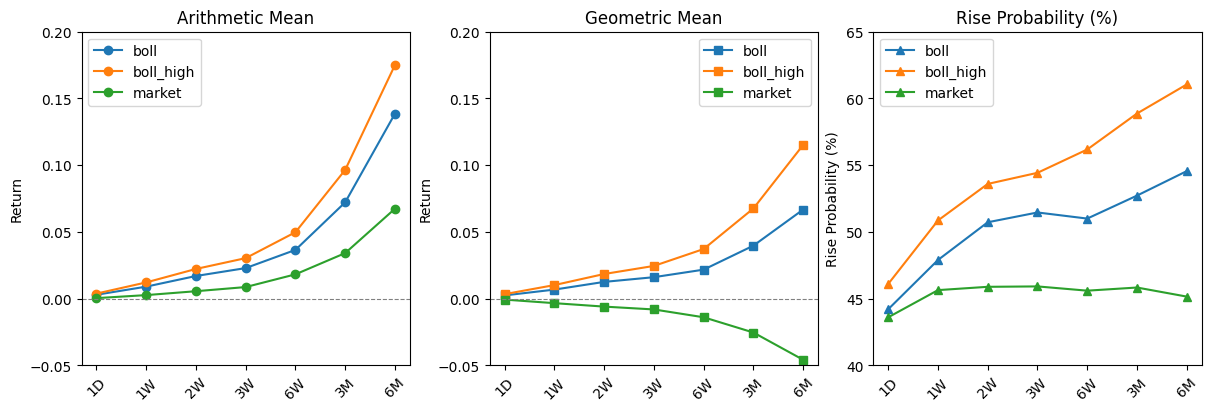

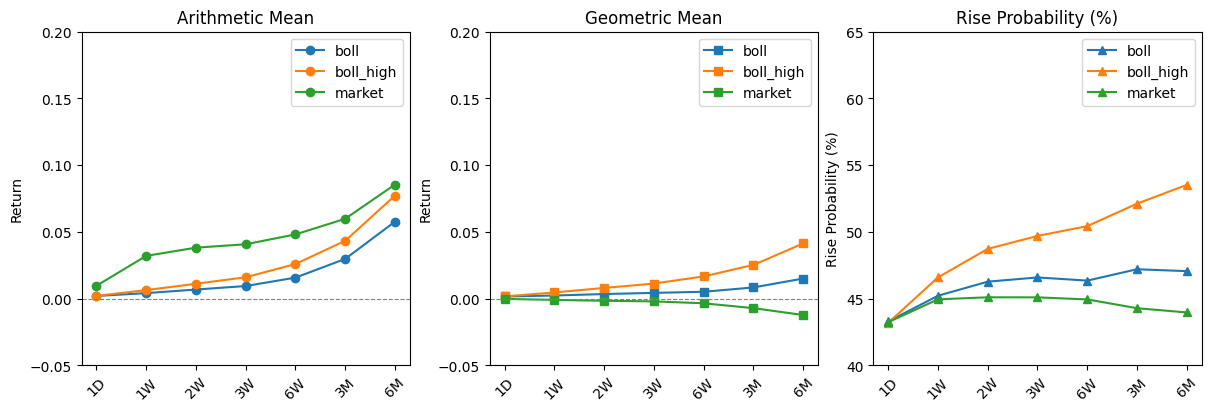

In [ ]:
stats.plot(start='2000-01-01', end='2011-12-31', **params)
stats.plot(start='2012-01-01', end='2025-12-31', **params)

(<Figure size 1200x400 with 3 Axes>,
 array([<Axes: title={'center': 'Arithmetic Mean'}, ylabel='Return'>,
        <Axes: title={'center': 'Geometric Mean'}, ylabel='Return'>,
        <Axes: title={'center': 'Rise Probability (%)'}, ylabel='Rise Probability (%)'>],
       dtype=object))

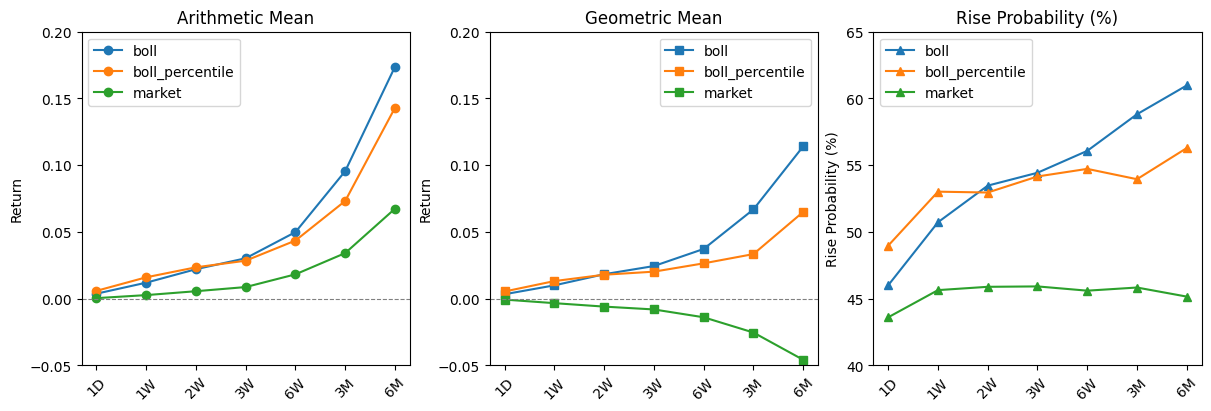

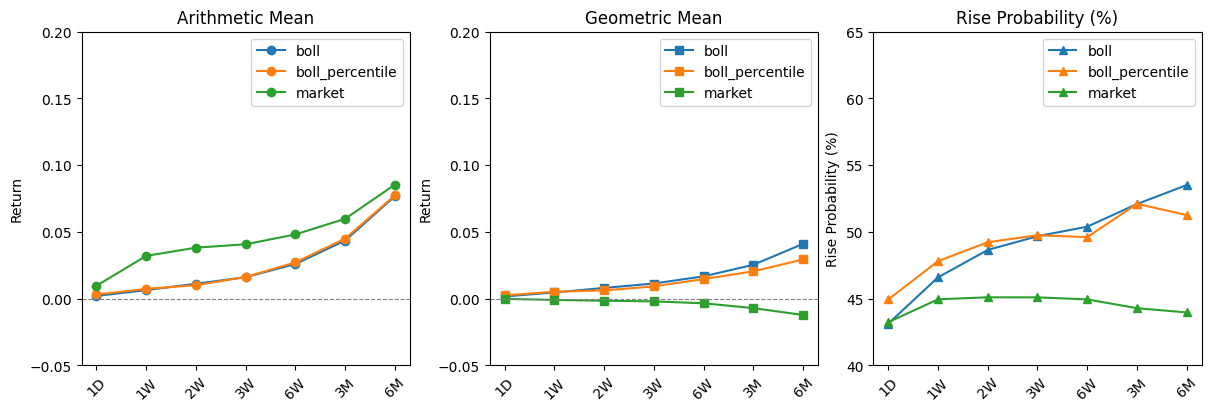

In [5]:
stats.plot(start='2000-01-01', end='2011-12-31', **params)
stats.plot(start='2012-01-01', end='2025-12-31', **params)

In [130]:
stats.to_frame(start='2012-01-01', end='2025-12-31')

count  arith_mean  geom_mean  \
pattern       period scope                                                     
market        1D     2012-01-02~2025-12-30  7331835.0    0.009643  -0.000204   
              1W     2012-01-02~2025-12-30  7330109.0    0.032036  -0.000946   
              2W     2012-01-02~2025-12-30  7327944.0    0.038184  -0.001592   
              3W     2012-01-02~2025-12-30  7325767.0    0.040727  -0.002061   
              6W     2012-01-02~2025-12-30  7296008.0    0.048116  -0.003483   
              3M     2012-01-02~2025-12-30  7206127.0    0.059823  -0.007117   
              6M     2012-01-02~2025-12-30  7028029.0    0.085474  -0.012261   
boll_breakout 1D     2012-01-02~2025-12-30   209997.0    0.002158   0.000761   
              1W     2012-01-02~2025-12-30   209989.0    0.003383  -0.002186   
              2W     2012-01-02~2025-12-30   209969.0    0.006420  -0.003045   
              3W     2012-01-02~2025-12-30   209951.0    0.008839  -0.004385   
              6W     2012-01-02~2025-12-30   209286.0    0.012603  -0.010831   
              3M     2012-01-02~2025-12-30   206996.0    0.022916  -0.017013   
              6M     2012-01-02~2025-12-30   202389.0    0.046219  -0.025267   
boll_topclose 1D     2012-01-02~2025-12-30  1326579.0    0.050697  -0.000413   
              1W     2012-01-02~2025-12-30  1326225.0    0.164053  -0.002059   
              2W     2012-01-02~2025-12-30  1325118.0    0.186228  -0.002718   
              3W     2012-01-02~2025-12-30  1323640.0    0.188273  -0.003029   
              6W     2012-01-02~2025-12-30  1314502.0    0.193382  -0.005710   
              3M     2012-01-02~2025-12-30  1292261.0    0.207171  -0.007193   
              6M     2012-01-02~2025-12-30  1251312.0    0.234672  -0.010288   

                                            rise_prob  
pattern       period scope                             
market        1D     2012-01-02~2025-12-30   0.432365  
              1W     2012-01-02~2025-12-30   0.449489  
              2W     2012-01-02~2025-12-30   0.451002  
              3W     2012-01-02~2025-12-30   0.450958  
              6W     2012-01-02~2025-12-30   0.449411  
              3M     2012-01-02~2025-12-30   0.442842  
              6M     2012-01-02~2025-12-30   0.439652  
boll_breakout 1D     2012-01-02~2025-12-30   0.435221  
              1W     2012-01-02~2025-12-30   0.434632  
              2W     2012-01-02~2025-12-30   0.442899  
              3W     2012-01-02~2025-12-30   0.441727  
              6W     2012-01-02~2025-12-30   0.430163  
              3M     2012-01-02~2025-12-30   0.431598  
              6M     2012-01-02~2025-12-30   0.425334  
boll_topclose 1D     2012-01-02~2025-12-30   0.366864  
              1W     2012-01-02~2025-12-30   0.388663  
              2W     2012-01-02~2025-12-30   0.398160  
              3W     2012-01-02~2025-12-30   0.398743  
              6W     2012-01-02~2025-12-30   0.399400  
              3M     2012-01-02~2025-12-30   0.411124  
              6M     2012-01-02~2025-12-30   0.414976